# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Abdul Fatah
- **Email:** abdulfatah.code@gmail.com
- **ID Dicoding:** abdul_fatah_18te

## Menentukan Pertanyaan Bisnis

- Di bulan dan musim apa saja rental sepeda menunjukkan performa terbaik ?
- Di kondisi seperti apa pelanggan memilih untuk terdaftar sebagai user ketika merental sepeda ?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Melakukan import dataset

In [3]:
df = pd.read_csv('https://drive.google.com/uc?id=16k6qPzr193bNf57w5CIri5Xz-iOy5N55')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight:**
- Data Terdiri dari 16 kolom dan 731 baris

#### Menampilkan informasi umum terkait dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- data berisi 15 feature, sebagian mengenai waktu pemesanan, sebagian yang lain terkait kondisi cuaca ketika itu
- beberapa data masih dalam bentuk label

### Assessing Data

#### Pengecekan duplikasi data

In [5]:
print('Jumlah data yang teduplikasi : ', df.duplicated().sum())

Jumlah data yang teduplikasi :  0


#### Pengecekan data yang kosong

In [6]:
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


#### Outlier

Tidak dilakukan pengecekan outlier, karena pada feature temp, atemp, hum, windspeed menunjukkan nilai yang unik, khas yang menunjukkan kondisi yang pasti berbeda beda setiap waktunya

#### Pengecekan Tipe Data setiap feature

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### Insight

**Insight:**
- Tidak terdapat data yang di duplikasi
- Tidak terdapat data yang hilang
- feature dteday memiliki tipe data object harusnya tipe data tanggal
- beberapa feature masih berupa data label

### Cleaning Data

#### Mengubah tipe data pada feature dteday

In [8]:
df['dteday'] = pd.to_datetime(df['dteday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Mengembalikan data label menjadi data asalnya, agar mudah di explore

In [9]:
data = df.copy()
data['season'] = data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
data['yr'] = data['yr'].map({0: 2011, 1: 2012})
data['weathersit'] = data['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light rain', 4: 'heavy rain'})
data['workingday'] = data['workingday'].map({0: 'no', 1: 'yes'})
data['holiday'] = data['holiday'].map({0: 'no', 1: 'yes'})
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,1,no,6,no,mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,1,no,0,no,mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,1,no,1,yes,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,1,no,2,yes,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,1,no,3,yes,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,spring,2012,12,no,4,yes,mist,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,spring,2012,12,no,5,yes,mist,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,spring,2012,12,no,6,no,mist,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,spring,2012,12,no,0,no,clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight:**
- data sudah dalam keadaan bersih dan mudah untuk dilakukan explore lebih lanjut

## Exploratory Data Analysis (EDA)

### Explore ...

#### Melihat jumlah rental setiap tahun, detail setiap bulan

In [10]:
byyear = data.groupby(by=['yr', 'mnth'])['cnt'].sum().reset_index()
byyear.sort_values(by='cnt', ascending=False)

,yr,mnth,cnt
20,2012,9,218573
19,2012,8,214503
18,2012,7,203607
17,2012,6,202830
21,2012,10,198841
16,2012,5,195865
15,2012,4,174224
14,2012,3,164875
22,2012,11,152664
5,2011,6,143512


#### Melihat jumlah rental setiap tahun, detail setiap musim

In [11]:
byseason = data.groupby(by=['yr', 'season'])['cnt'].sum().reset_index()
byseason.sort_values(by='cnt', ascending=False)

,yr,season,cnt
4,2012,fall,641479
6,2012,summer,571273
7,2012,winter,515476
0,2011,fall,419650
2,2011,summer,347316
3,2011,winter,326137
5,2012,spring,321348
1,2011,spring,150000


#### Melihat jumlah rental ketika holiday

In [12]:
byholiday = data.groupby(by='holiday')['cnt'].sum().sort_values(ascending=False)
byholiday

,cnt
holiday,
no,3214244
yes,78435


#### Melihat jumlah rental ketika workday

In [13]:
byworkday = data.groupby(by='workingday')['cnt'].sum().sort_values(ascending=False)
byworkday

,cnt
workingday,
yes,2292410
no,1000269


#### Melihat jumlah rental setiap tahun, detail setiap kondisi cuaca

In [14]:
byweather = data.groupby(by=['yr', 'weathersit'])['cnt'].sum().sort_values(ascending=False)
byweather

yr    weathersit
2012  clear         1422885
2011  clear          835067
2012  mist           613934
2011  mist           382924
      light rain      25112
2012  light rain      12757
Name: cnt, dtype: int64

#### Melihat kondisi cuaca, apakah ada hari dimana terjadi hujan lebat

In [15]:
heavyrain = data[data['weathersit'] == 'heavy rain']
heavyrain

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


#### Menghitung penambahan registered user disetiap bulan dan tahunnya

In [16]:
data['amnt_newmember'] = data['registered'].diff()
data.fillna(0, inplace=True)
newmember_byyear = data.groupby(by=['yr', 'mnth'])['amnt_newmember'].sum().reset_index()
newmember_byyear.sort_values(by='amnt_newmember', ascending=False)

,yr,mnth,amnt_newmember
12,2012,1,2365.0
14,2012,3,2165.0
18,2012,7,2016.0
3,2011,4,1841.0
7,2011,8,1592.0
16,2012,5,1331.0
5,2011,6,1179.0
15,2012,4,973.0
0,2011,1,805.0
21,2012,10,273.0


#### Jumlah Penambahan registered user setiap musim

In [17]:
newmember_byseason = data.groupby(by=['yr', 'season'])['amnt_newmember'].sum().reset_index()
newmember_byseason.sort_values(by='amnt_newmember', ascending=False)

,yr,season,amnt_newmember
2,2011,summer,1887.0
5,2012,spring,1698.0
0,2011,fall,929.0
4,2012,fall,544.0
6,2012,summer,297.0
3,2011,winter,-706.0
1,2011,spring,-944.0
7,2012,winter,-2069.0


#### Melihat Musim pada bulan dengan penggunaan rental terbanyak

In [18]:
# juni - juli 2011
pd.set_option('display.max_rows', None)
data[(data['mnth'] == 6) & (data['yr'] == 2011) | (data['mnth'] == 7) & (data['yr'] == 2011)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,amnt_newmember
151,152,2011-06-01,summer,2011,6,no,3,yes,mist,0.764167,0.720967,0.677083,0.207092,513,3461,3974,152.0
152,153,2011-06-02,summer,2011,6,no,4,yes,clear,0.715000,0.643942,0.305000,0.292287,736,4232,4968,771.0
153,154,2011-06-03,summer,2011,6,no,5,yes,clear,0.620000,0.587133,0.354167,0.253121,898,4414,5312,182.0
154,155,2011-06-04,summer,2011,6,no,6,no,clear,0.635000,0.594696,0.456250,0.123142,1869,3473,5342,-941.0
155,156,2011-06-05,summer,2011,6,no,0,no,mist,0.648333,0.616804,0.652500,0.138692,1685,3221,4906,-252.0
156,157,2011-06-06,summer,2011,6,no,1,yes,clear,0.678333,0.621858,0.600000,0.121896,673,3875,4548,654.0
157,158,2011-06-07,summer,2011,6,no,2,yes,clear,0.707500,0.655950,0.597917,0.187808,763,4070,4833,195.0
158,159,2011-06-08,summer,2011,6,no,3,yes,clear,0.775833,0.727279,0.622083,0.136817,676,3725,4401,-345.0
159,160,2011-06-09,summer,2011,6,no,4,yes,mist,0.808333,0.757579,0.568333,0.149883,563,3352,3915,-373.0
160,161,2011-06-10,summer,2011,6,no,5,yes,clear,0.755000,0.703292,0.605000,0.140554,815,3771,4586,419.0


In [19]:
# agustus - september 2012
data[ (data['mnth'] == 8) & (data['yr'] == 2012) | (data['mnth'] == 9) & (data['yr'] == 2012)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,amnt_newmember
578,579,2012-08-01,fall,2012,8,no,3,yes,clear,0.717500,0.667308,0.677500,0.141179,1074,6506,7580,258.0
579,580,2012-08-02,fall,2012,8,no,4,yes,clear,0.752500,0.707088,0.659583,0.129354,983,6278,7261,-228.0
580,581,2012-08-03,fall,2012,8,no,5,yes,mist,0.765833,0.722867,0.642500,0.215792,1328,5847,7175,-431.0
581,582,2012-08-04,fall,2012,8,no,6,no,clear,0.793333,0.751267,0.613333,0.257458,2345,4479,6824,-1368.0
582,583,2012-08-05,fall,2012,8,no,0,no,clear,0.769167,0.731079,0.652500,0.290421,1707,3757,5464,-722.0
583,584,2012-08-06,fall,2012,8,no,1,yes,mist,0.752500,0.710246,0.654167,0.129354,1233,5780,7013,2023.0
584,585,2012-08-07,fall,2012,8,no,2,yes,mist,0.735833,0.697621,0.703750,0.116908,1278,5995,7273,215.0
585,586,2012-08-08,fall,2012,8,no,3,yes,mist,0.750000,0.707717,0.672917,0.110700,1263,6271,7534,276.0
586,587,2012-08-09,fall,2012,8,no,4,yes,clear,0.755833,0.699508,0.620417,0.156100,1196,6090,7286,-181.0
587,588,2012-08-10,fall,2012,8,no,5,yes,mist,0.715833,0.667942,0.715833,0.238813,1065,4721,5786,-1369.0


#### Insight

**Insight:**
- rental terbanyak terdapat pada musim gugur dan paling sedkit pada musim semi
- rental terbanyak di tahun 2012 terjadi pada bulan September, dan pada tahun 2011 terjadi pada bulan Juni
- Kondisi cuaca yang paling digemari oleh pelanggan rental sepeda adalah cuaca cerah
- Penambahan registered user dalam kurun waktu 2 tahun selalu terjadi penambhana pada musim gugur dan musim panas

## Visualization & Explanatory Analysis

### Pertanyaan 1: Di bulan dan musim apa saja rental sepeda menunjukkan performa terbaik ?

<ipython-input-20-e99b5f0b3412>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=byyear[byyear['yr'] == year[i]], x='mnth', y='cnt',
<ipython-input-20-e99b5f0b3412>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=byyear[byyear['yr'] == year[i]], x='mnth', y='cnt',


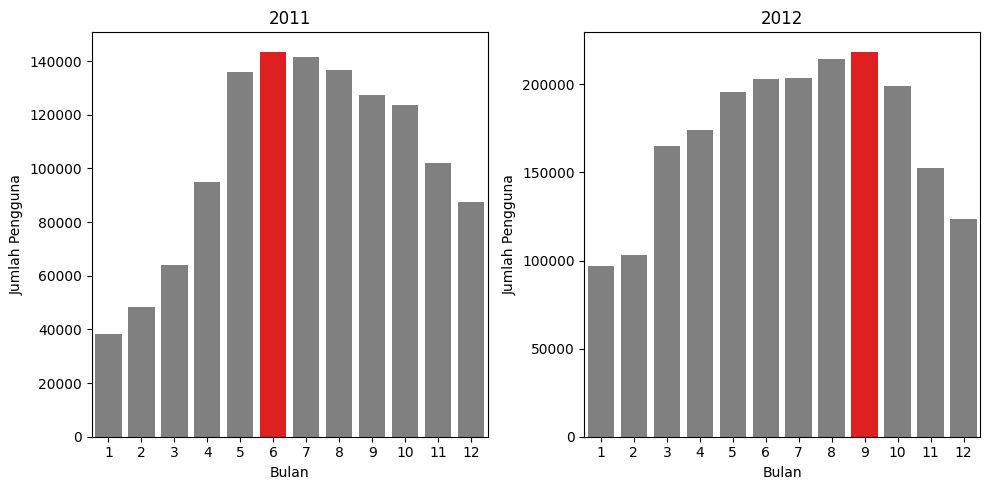

In [20]:
# grafik batang jumlah pengguna rental sepeda setiap bulan

maxdata_2011 = byyear[byyear['yr'] == 2011]['cnt'].max()
maxdata_2012 = byyear[byyear['yr'] == 2012]['cnt'].max()
year = [2011, 2012]

plt.figure(figsize=(10, 5))

for i in range(len(year)):
  maxdata = [maxdata_2011, maxdata_2012]
  colors = ['red' if cnt == maxdata[i] else 'grey' for cnt in byyear[byyear['yr'] == year[i]]['cnt']]
  plt.subplot(1, 2, i+1)
  sns.barplot(data=byyear[byyear['yr'] == year[i]], x='mnth', y='cnt',
              palette = colors,)
  plt.title(f'{year[i]}')
  plt.xlabel('Bulan')
  plt.ylabel('Jumlah Pengguna')

plt.tight_layout()
plt.show()

<ipython-input-21-ba05b6bd623b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=byseason[byseason['yr'] == year[i]], x='season', y='cnt',
<ipython-input-21-ba05b6bd623b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=byseason[byseason['yr'] == year[i]], x='season', y='cnt',


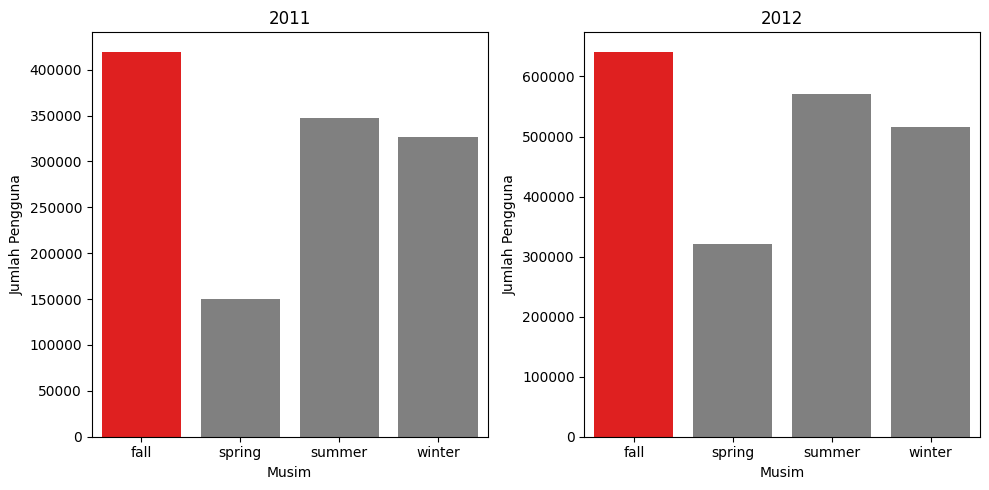

In [21]:
# grafik batang jumlah pengguna rental setiap musim
maxdata_season2021 = byseason[byseason['yr'] == 2011]['cnt'].max()
maxdata_season2022 = byseason[byseason['yr'] == 2012]['cnt'].max()
year = [2011, 2012]

plt.figure(figsize=(10, 5))

for i in range(len(year)):
  maxdata = [maxdata_season2021, maxdata_season2022]
  colors = ['red' if cnt == maxdata[i] else 'grey' for cnt in byseason[byseason['yr'] == year[i]]['cnt']]
  plt.subplot(1, 2, i+1)
  sns.barplot(data=byseason[byseason['yr'] == year[i]], x='season', y='cnt',
              palette = colors,)
  plt.title(f'{year[i]}')
  plt.xlabel('Musim')
  plt.ylabel('Jumlah Pengguna')

plt.tight_layout()
plt.show()

### Pertanyaan 2: Di kondisi seperti apa pelanggan memilih untuk terdaftar seabagai user ketika merental sepeda ?

<ipython-input-22-90f8769e5b45>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=newmember_byyear[newmember_byyear['yr'] == year[i]], x='mnth', y='amnt_newmember',
<ipython-input-22-90f8769e5b45>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=newmember_byyear[newmember_byyear['yr'] == year[i]], x='mnth', y='amnt_newmember',


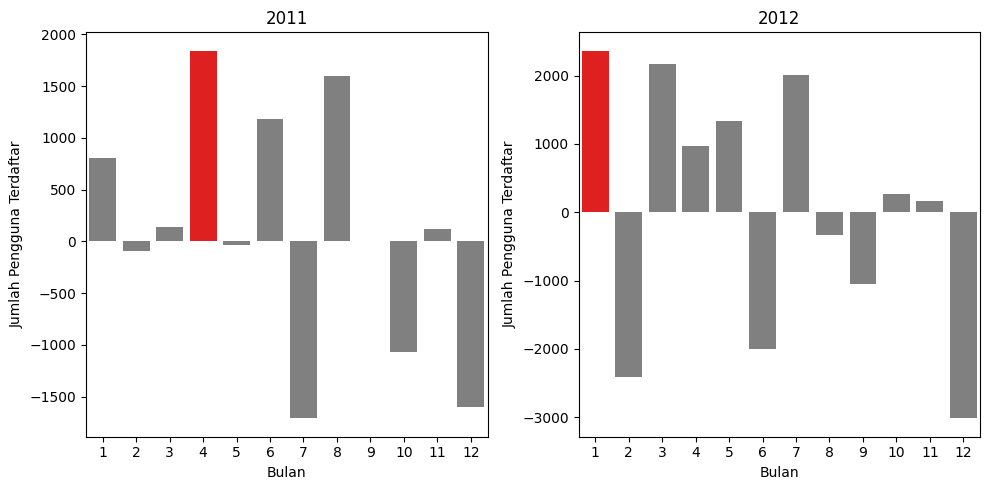

In [22]:
maxdata_newmember_2021 = newmember_byyear[newmember_byyear['yr'] == 2011]['amnt_newmember'].max()
maxdata_newmember_2022 = newmember_byyear[newmember_byyear['yr'] == 2012]['amnt_newmember'].max()
year = [2011, 2012]

plt.figure(figsize=(10, 5))

for i in range(len(year)):
  maxdata = [maxdata_newmember_2021, maxdata_newmember_2022]
  colors = ['red' if cnt     == maxdata[i] else 'grey' for cnt in newmember_byyear[newmember_byyear['yr'] == year[i]]['amnt_newmember']]
  plt.subplot(1, 2, i+1)
  sns.barplot(data=newmember_byyear[newmember_byyear['yr'] == year[i]], x='mnth', y='amnt_newmember',
              palette = colors,)
  plt.title(f'{year[i]}')
  plt.xlabel('Bulan')
  plt.ylabel('Jumlah Pengguna Terdaftar')

plt.tight_layout()
plt.show()

<ipython-input-23-ec4ba9fb40fc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=newmember_byseason[newmember_byseason['yr'] == year[i]], x='season', y='amnt_newmember',
<ipython-input-23-ec4ba9fb40fc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=newmember_byseason[newmember_byseason['yr'] == year[i]], x='season', y='amnt_newmember',


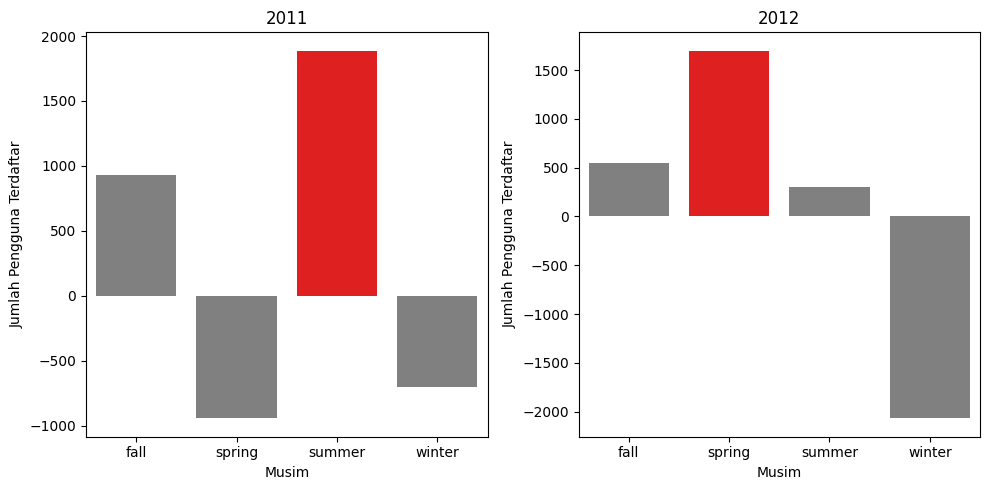

In [23]:
maxdata_newmemberseason_2021 = newmember_byseason[newmember_byseason['yr'] == 2011]['amnt_newmember'].max()
maxdata_newmemberseason_2022 = newmember_byseason[newmember_byseason['yr'] == 2012]['amnt_newmember'].max()

year = [2011, 2012]

plt.figure(figsize=(10, 5))

for i in range(len(year)):
  maxdata = [maxdata_newmemberseason_2021, maxdata_newmemberseason_2022]
  colors = ['red' if cnt == maxdata[i] else 'grey' for cnt in newmember_byseason[newmember_byseason['yr'] == year[i]]['amnt_newmember']]
  plt.subplot(1, 2, i+1)
  sns.barplot(data=newmember_byseason[newmember_byseason['yr'] == year[i]], x='season', y='amnt_newmember',
              palette = colors,)
  plt.title(f'{year[i]}')
  plt.xlabel('Musim')
  plt.ylabel('Jumlah Pengguna Terdaftar')

plt.tight_layout()
plt.show()

**Insight:**
- pengguna rental terbanyak terdapat pada bulan Juni - Juli pada tahun 2011, dan Agustus - September pada tahun 2012 yang bertepatan dengan musim gugur
- Pengguna rental cenderung mendaftar sebagai user di akhir musim semi, atau di awal musim panas

## Analisis Lanjutan (Opsional)

In [26]:
# CLUSTERING BERDASARKAN JUMLAH PELANGGAN YANG MELAKUKAN RENTAL
# PENGGUNAAN TINGGI : > 7000
# PENGGUNAAN SEDANG : 3000 - 6000
# PENGGUNAAN RENDAH : < 3000

df['cluster'] = df['cnt'].apply(lambda x: 'tinggi' if x > 6000 else ('sedang' if x > 3000 else 'rendah'))
clustering_data = df.groupby(by='cluster')['dteday'].count().reset_index()
clustering_data

,cluster,dteday
0,rendah,172
1,sedang,379
2,tinggi,180


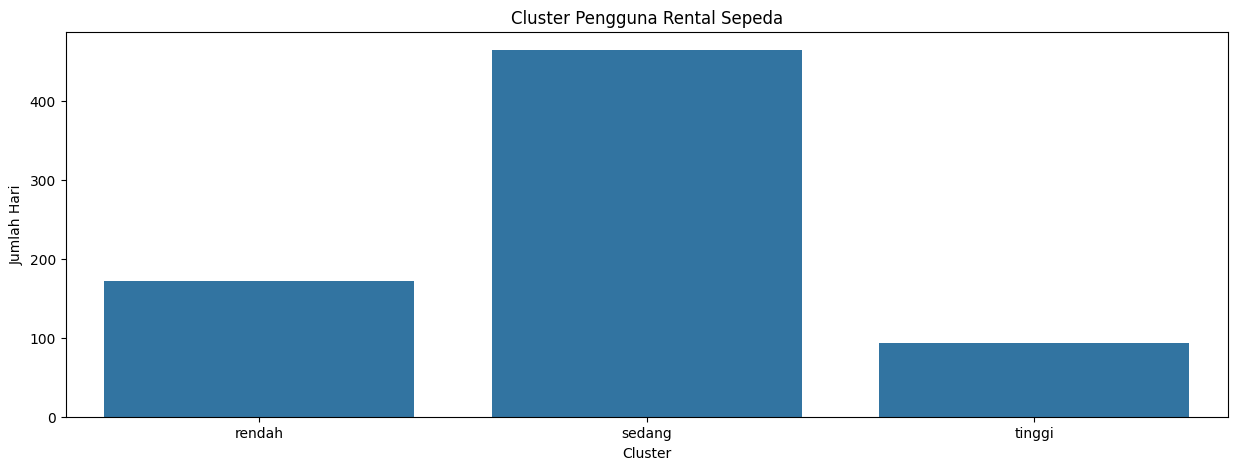

In [25]:
# VISUALISASI
plt.figure(figsize=(15, 5))
sns.barplot(data=clustering_data, x='cluster', y='dteday')
plt.ylabel('Jumlah Hari')
plt.xlabel('Cluster')
plt.title('Cluster Pengguna Rental Sepeda')
plt.show()

## Conclusion

**- Conclution : Di bulan dan musim apa saja rental sepeda menunjukkan performa terbaik ?**

pengguna rental terbanyak terdapat pada bulan Juni - Juli pada tahun 2011, dan Agustus - September pada tahun 2012 yang bertepatan dengan musim gugur

**- Conclution : Di kondisi seperti apa pelanggan memilih untuk terdaftar sebagai user ketika merental sepeda ?**

Pengguna rental cenderung mendaftar sebagai user di akhir musim semi, atau di awal musim panas

**- Conclution : Clustering**

Cluster pertama penggunaan rendah sebanyak 172 hari
Cluster kedua penggunaan sedang sebanyak 379 hari
cluster ketiga penggunaan tinggi sebanyak 180 hari

In [28]:
# DOWNLOAD DF
df.to_csv('df_clean.csv')
from google.colab import files

# Download file
files.download('df_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>